Objective :  Take in PCA data, output cluster data with various models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input PCA data
path = "D:/milestone project/SIADS_694_695_Milestone_II/"
train_file = path + "data/X_train_pca.csv"
PCA_X_train = pd.read_csv(train_file)

In [3]:
PCA_X_train.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train.set_index('CellID', inplace = True)
PCA_X_train.shape

(40348, 100)

In [4]:
PCA_X_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,PC_98,PC_99,PC_100
CellID,,,,,,,,,,,,,,,,,,,,,
TCAGCTCCACTGTTAG_18,-4.992897,1.977498,2.635594,0.294221,-0.352566,0.480022,-0.607563,0.537431,0.354954,0.988225,...,-0.462457,0.087501,-0.052739,0.556482,0.054646,0.224667,-0.169349,0.542468,-0.846616,0.508633
TGCTGCTTCGTGGTCG_24,10.464980,-4.179799,10.248424,13.373024,-0.398263,-1.284958,2.211709,0.475666,-0.210211,2.024235,...,-1.277020,1.558242,-0.576477,0.078703,4.163578,-2.982152,2.011843,-2.500248,-2.785146,-0.459969
TAAACCGAGCCAGTTT_23,11.897502,10.368381,-9.752729,-0.730838,-6.437631,-3.039107,1.155987,-0.674261,1.225245,0.872170,...,-1.720728,2.017200,-0.437286,-0.466728,1.741292,2.205787,0.025304,0.891656,0.706868,-0.884583
GTAGTCACAGACAAGC_16,0.143768,-8.355670,-4.339652,-0.964086,1.019567,-0.285466,-0.621729,-0.871517,0.075749,-0.569461,...,-0.432216,0.092154,-0.113035,-0.005142,1.322794,-0.699368,0.830745,0.142501,0.077562,-0.580459
CTAATGGGTCCAACTA_14,-4.288423,1.525256,2.442547,-1.382999,0.668757,2.043472,-2.643853,1.329935,-2.210888,-2.007608,...,0.774587,0.386319,0.501365,-2.406939,-0.897188,0.785342,1.719547,1.565029,1.475988,2.158263


In [5]:
y_train_file = path + "data/y_train.csv"
y_train = pd.read_csv(y_train_file)

In [6]:
y_train.set_index('CellID', inplace = True)
y_train

,type
CellID,
TCAGCTCCACTGTTAG_18,CD4 T
TGCTGCTTCGTGGTCG_24,Endothelial
TAAACCGAGCCAGTTT_23,Tumor
GTAGTCACAGACAAGC_16,Myeloid
CTAATGGGTCCAACTA_14,CD8 T
...,...
CTACGTCAGTTACGGG_23,CD8 T
AGGTCATAGCTCCCAG_19,Tumor
GGATTACAGCACACAG_23,CD8 T


In [7]:
#number of unique labels
print("number of cell types", len(y_train.type.unique()))
labels  = y_train.type.unique()

number of cell types 14


Agglomerative Clustering - Given the type of data we have, I have high hopes this will be usefull.

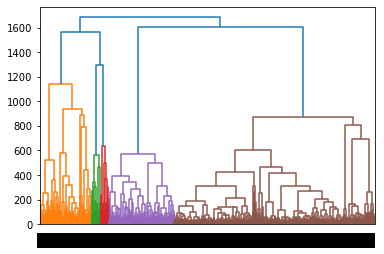

In [8]:
# Create model and plot
# the ward function created the model
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
plt.figure()
model = ward(PCA_X_train)
dendrogram(model)
plt.show()

Source:  https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [9]:
#create labels from the aggolmerative clustering to test 
k=14  # number of clusters
agglo_labels  = fcluster(model, k, criterion='maxclust')
len(agglo_labels)

40348

If we have ground truth labels, metrics to use

In [10]:
from sklearn import metrics
agglo_adjrand = metrics.adjusted_rand_score(y_train.type.values, agglo_labels)
agglo_homogeneity = metrics.homogeneity_score(y_train.type.values, agglo_labels)
agglo_vmeasure = metrics.v_measure_score(y_train.type.values, agglo_labels)
agglo_complete = metrics.completeness_score(y_train.type.values, agglo_labels)

In [11]:
print("Homogeneity", agglo_homogeneity)
print("Completeness", agglo_complete)
print("V-measure", agglo_vmeasure)
print("Adjusted Rand Index", agglo_adjrand)


Homogeneity 0.7629973418122455
Completeness 0.7587145328649937
V-measure 0.7608499104248575
Adjusted Rand Index 0.6958801369312123


In [14]:
#silhoutte chart here

Kmeans - the simplist model - not expected to do well with genetic data, but
is expected to be fast

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train)

In [17]:
kmean_adjrand = metrics.adjusted_rand_score(y_train.type.values, kmeans.labels_)
kmean_homogeneity = metrics.homogeneity_score(y_train.type.values, kmeans.labels_)
kmean_vmeasure = metrics.v_measure_score(y_train.type.values, kmeans.labels_)
kmean_complete = metrics.completeness_score(y_train.type.values, kmeans.labels_)

In [18]:
print("Homogeneity", kmean_homogeneity)
print("Completeness", kmean_complete)
print("V-measure", kmean_vmeasure)
print("Adjusted Rand Index", kmean_adjrand)

Homogeneity 0.750287718380374
Completeness 0.7319011271961763
V-measure 0.7409803797173182
Adjusted Rand Index 0.6456810119303725


In [19]:
# shamelessly adapt given code from sklearn 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py


For n_clusters = 10 The average silhouette_score is : 0.22582283602201586
For n_clusters = 12 The average silhouette_score is : 0.09785741654414297
For n_clusters = 14 The average silhouette_score is : 0.10682139241551394
For n_clusters = 16 The average silhouette_score is : 0.11021371520460764


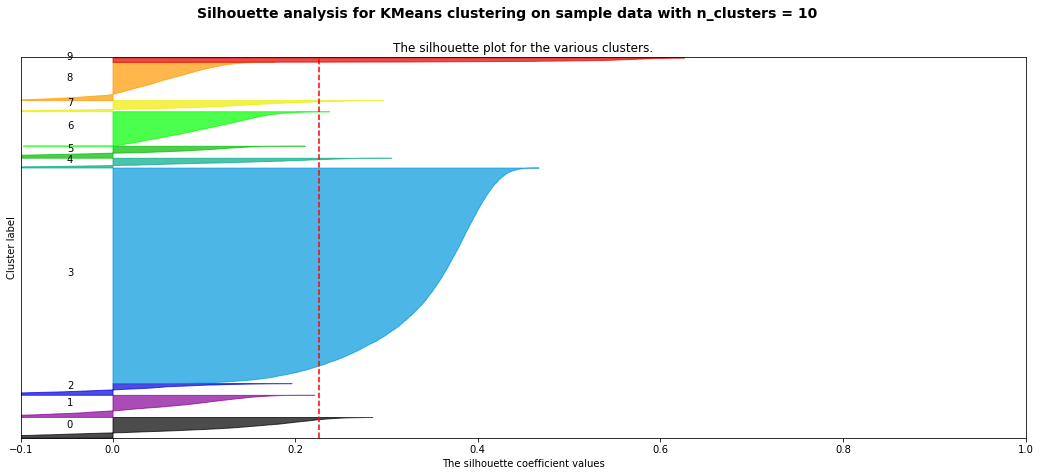

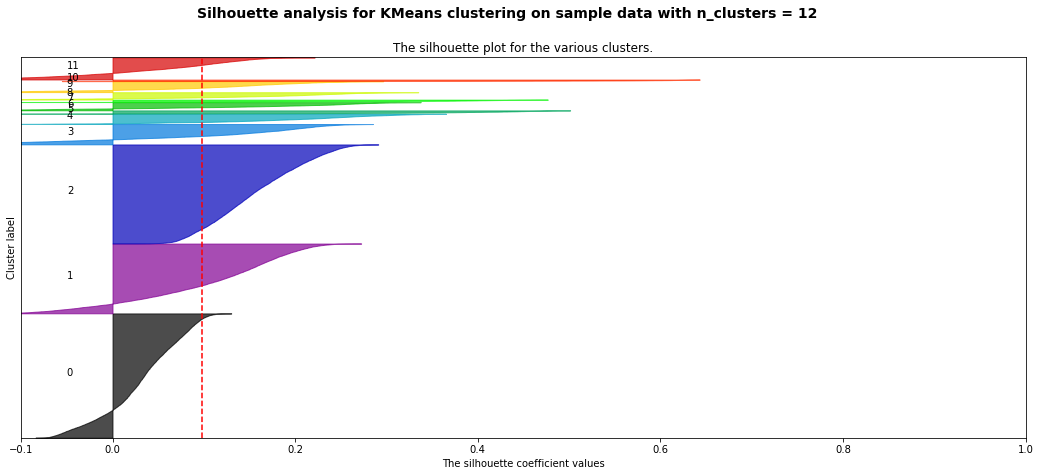

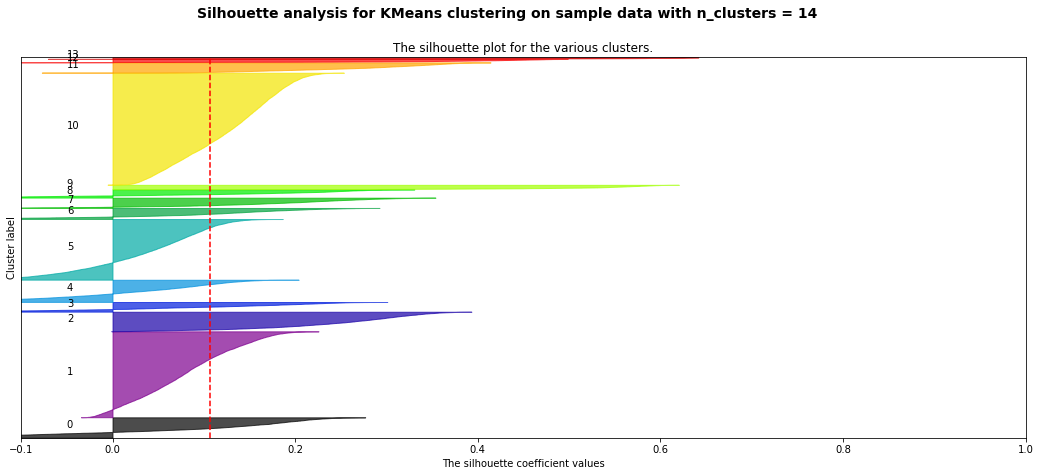

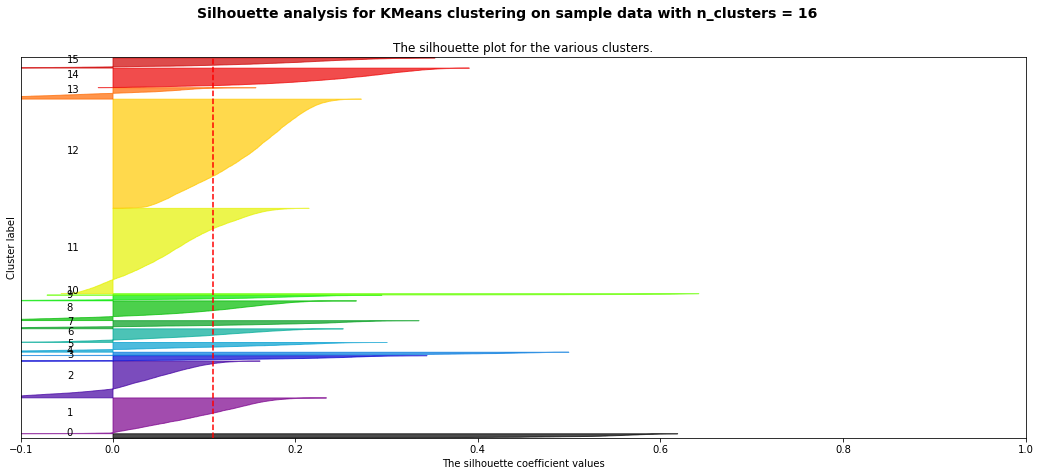

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [10, 12, 14, 16]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PCA_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(PCA_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCA_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCA_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

DBSCAN - high hopes with this algo.  
    - two parameters to play with min_samples and eps

In [23]:
from sklearn.cluster import DBSCAN

#running the defaults
dbscan = DBSCAN()
db_labels = dbscan.fit_predict(PCA_X_train)

In [24]:
db_adjrand = metrics.adjusted_rand_score(y_train.type.values, db_labels)
db_homogeneity = metrics.homogeneity_score(y_train.type.values, db_labels)
db_vmeasure = metrics.v_measure_score(y_train.type.values, db_labels)
db_complete = metrics.completeness_score(y_train.type.values, db_labels)

In [25]:
print("Homogeneity", db_homogeneity)
print("Completeness", db_complete)
print("V-measure", db_vmeasure)
print("Adjusted Rand Index", db_adjrand)

Homogeneity 0.0
Completeness 1.0
V-measure 0.0
Adjusted Rand Index 0.0


In [26]:
# LOL , need to adjust the parameters

In [31]:
# what do our labels look like?
# copy paste https://www.kite.com/python/answers/how-to-count-frequency-of-unique-values-in-a-numpy-array-in-python
# was going to use a counter object
(unique, counts) = np.unique(db_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   -1 40348]]


In [ ]:
#copy / paste from SKlearn
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# Compute DBSCAN
db = DBSCAN(eps=9.5, min_samples=4).fit(PCA_X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train.type.values, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train.type.values, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train.type.values, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train.type.values, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train.type.values, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(PCA_X_train, labels))

Estimated number of clusters: 15
Estimated number of noise points: 15005
Homogeneity: 0.185
Completeness: 0.510
V-measure: 0.271
Adjusted Rand Index: 0.185
Adjusted Mutual Information: 0.271
